In [1]:
##imports -- run first thing!
import numpy as np
import scipy as sp
from scipy import integrate
from scipy import interpolate
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
##clear PT.csv, L_obs.csv, L_obs_Norm.csv before running full program
##we're not using them in this rewrite but eehhhhh just to have
open('PT.csv', 'w').close()
open('L_obs.csv', 'w').close()
open('L_obs_Norm.csv', 'w').close()

minimum Lorentz factor wanted is: 2.6
theta max for the given Lorentz Factor is: 14.4
[[0.00000000e+00 1.25011950e+03]
 [1.00000000e+00 2.40782452e+03]
 [2.00000000e+00 3.09683881e+03]
 [3.00000000e+00 2.34225756e+03]
 [4.00000000e+00 2.07542491e+03]
 [5.00000000e+00 1.64440037e+03]
 [6.00000000e+00 1.24838015e+03]
 [7.00000000e+00 9.24490994e+02]
 [8.00000000e+00 6.64151906e+02]
 [9.00000000e+00 4.91175543e+02]
 [1.00000000e+01 3.50007685e+02]
 [1.10000000e+01 2.11232436e+02]
 [1.20000000e+01 1.06591893e+02]
 [1.30000000e+01 5.46433274e+01]
 [1.40000000e+01 3.11197612e+01]
 [1.50000000e+01 1.95351727e+01]
 [1.60000000e+01 1.31727013e+01]
 [1.70000000e+01 9.34415936e+00]
 [1.80000000e+01 6.87518959e+00]
 [1.90000000e+01 5.19772041e+00]
 [2.00000000e+01 4.01167227e+00]
 [2.10000000e+01 3.14676722e+00]
 [2.20000000e+01 2.50054682e+00]
 [2.30000000e+01 2.00828338e+00]
 [2.40000000e+01 1.62738406e+00]
 [2.50000000e+01 1.32884541e+00]
 [2.60000000e+01 1.09234067e+00]
 [2.70000000e+01 9.0327

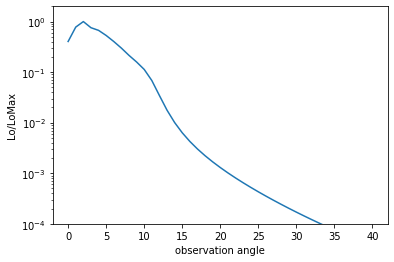

In [3]:
##declares
theta_o = 0.0
phi = 0.0
PT_arr = np.array([])
Lo_arr = np.array([])

##formula stuff
Gtheta = pd.read_csv('GT0.csv', sep = ',', header = None, names = ['theta','gamma'])
Ltheta = pd.read_csv('LT0.csv', sep = ',', header = None, names = ['theta','L'])
Btheta = np.sqrt(1-(1/((Gtheta['gamma'])**2)))

##theta max index calculator
inmin = float(input("minimum Lorentz factor wanted is: "))
Gadjust = (Gtheta['gamma']-inmin)**2
Gmin = np.where(Gadjust == Gadjust.min())
GminFar = max(Gmin[0])+1
theta_max = (int(GminFar)*0.1)
print("theta max for the given Lorentz Factor is: " + str(theta_max))


##theta observed selection and phi integral
while (theta_o <= (41*np.pi/180)):
    ##phi selection and theta integral
    while (phi <= 2*np.pi):
        cosalph = (np.cos(theta_o)*np.cos(Ltheta['theta'][0:GminFar]*np.pi/180))+(np.sin(theta_o)*np.sin(Ltheta['theta'][0:GminFar]*np.pi/180)*np.cos(phi))
        num = Ltheta['L']*np.sin(Ltheta['theta'][0:GminFar]*np.pi/180)
        den = 4*np.pi*(Gtheta['gamma'][0:GminFar]**4)*((1-(Btheta*cosalph))**3)
        ans = (num/den)
        theta_int = sp.integrate.trapz(y = ans[0:GminFar], x = Ltheta['theta'][0:GminFar])
        PT_arr_i = np.array([(phi*180.0/np.pi), theta_int])
        PT_arr = np.append(PT_arr, PT_arr_i, 0)
        phi = phi+2*np.pi/72 #2*np.pi/n, count by 360/n degrees at a time
    PT = PT_arr.reshape(73,2) #shape(n rows, 2 columns), n = (phi n + 1) ↓↓ [0:n, a] is the same
    phi_int = sp.integrate.trapz(y = (PT[0:73, 1]), x = (PT[0:73,0]))
    Lo_arr_i = np.array([(theta_o*180.0/np.pi), phi_int])
    Lo_arr = np.append(Lo_arr, Lo_arr_i, 0)    
    theta_o = theta_o+(1*np.pi/180.0) #n*np.pi/180, count by n degrees at a time
    phi = 0
    PT_arr = np.array([])
Lo = Lo_arr.reshape(41,2)
print(Lo)

##Lo Normalization
Nval = max(Lo[0:41,1])
LoN = Lo[0:41,1]/Nval

##Graphing of Normalized Function, Normalized Previous Function, and Fucntion from Paper
plt.ylabel("Lo/LoMax")
plt.yscale("log")
plt.ylim(.0001, 2)
plt.xlabel("observation angle")

x1 = Lo[0:41,0]
y1 = LoN[0:41]
plt.plot(x1,y1)

#L_o_n = pd.read_csv('L_obs_Norm.csv', sep = ',', header = None, names = ['theta_o','L'])
#x2 = L_o_n['theta_o']
#y2 = L_o_n['L']
#plt.scatter(x2,y2)

#L_O_N = pd.read_csv('L-Lobs.csv', sep = ',', header = None, names = ['theta_o','L'])
#x3 = L_O_N['theta_o']
#y3 = L_O_N['L']
#plt.plot(x3,y3)